In [1]:
using Pkg, Plots
gr(fmt = :png)
pkg"activate ."
pkg"instantiate"
pkg"precompile"
using PerlaTonettiWaugh, Parameters, Sundials

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Precompiling project...


# Steady states

## Stationary Solution

Set up parameters and find the corresponding stationary solution:

In [2]:
z_ex = settings_simple().z_ex
stationary_sol = stationary_numerical_simple(params_simple(), z_ex)

(g = 0.01053208149710963, v = [25.4872, 25.3619, 25.2395, 25.1199, 25.0031, 24.8889, 24.7773, 24.6683, 24.5618, 24.4578  …  20.0199, 20.0198, 20.0195, 20.0189, 20.0178, 20.0153, 20.0101, 19.9993, 19.9766, 19.9291])

# Transition dynamics

Setup for optimizer:

In [3]:
g_T = stationary_sol.g
params_transition = params_simple(r = t -> (0.05 - 1e-02 * (1 - t / 100.0)), π = (t, x) -> 1)

ω = ω_weights(z_ex, params_transition.θ, params_transition.ξ);

settings = merge(settings_simple(), (g = t -> g_T,))

(z_ex = 0.0:0.005005005005005005:5.0, T = 100.0, iterations = 1000, t_grid = 0.0:0.1001001001001001:100.0, g = getfield(Main, Symbol("##7#8"))())

Find the corresponding solution:

In [4]:
daeprob = simpleDAE(params_transition, settings)

DAEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (100.0, 0.0)
u0: [25.4872, 25.3619, 25.2395, 25.1199, 25.0031, 24.8889, 24.7773, 24.6683, 24.5618, 24.4578  …  20.0198, 20.0195, 20.0189, 20.0178, 20.0153, 20.0101, 19.9993, 19.9766, 19.9291, 0.0105321]
du0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [5]:
@time residuals, v_ts, g_ts = solve_simple_dae(daeprob, params_transition.x, ω, IDA(), settings.t_grid);

  7.188681 seconds (13.23 M allocations: 7.970 GiB, 15.32% gc time)


# Plots

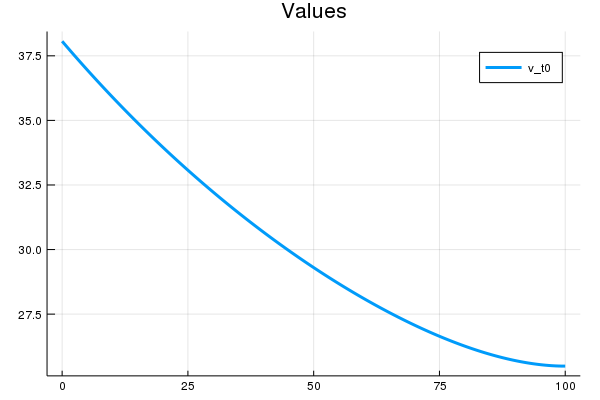

In [6]:
ts = plot(settings.t_grid, v_ts[1,:], label = "v_t0", lw = 3, title = "Values")

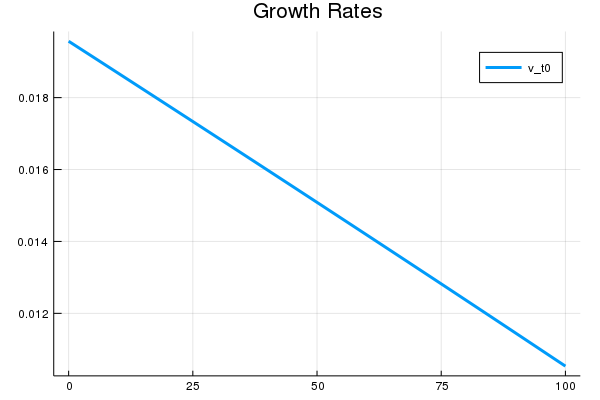

In [7]:
ts = plot(settings.t_grid, g_ts[1:end], label = "v_t0", lw = 3, title = "Growth Rates")

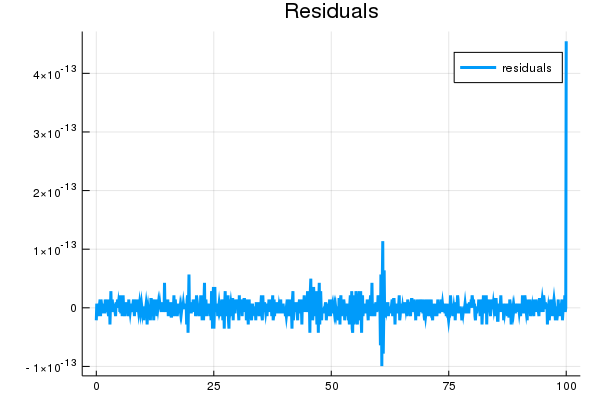

In [8]:
ts = plot(settings.t_grid, residuals, label = "residuals", lw = 3, title = "Residuals")

In [9]:
residuals[end]

4.547473508864641e-13